In [11]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np

In [16]:
# Read in the image and print out some stats
image = mpimg.imread('test.jpg')
print('This image is: ',type(image),'with dimensions:', image.shape)

# Grab the x and y size and make a copy of the image
ysize = image.shape[0]
xsize = image.shape[1]
# Note: always make a copy rather than simply using "="
color_select = np.copy(image)

This image is:  <class 'numpy.ndarray'> with dimensions: (540, 960, 3)


In [18]:
#Next I define a color threshold in the variables red_threshold, green_threshold,
# and blue_threshold and populate rgb_threshold with these values. This vector contains the minimum values for red, green, 
# and blue (R,G,B) that I will allow in my selection.

# Define our color selection criteria
# Note: if you run this code, you'll find these are not sensible values!!
# But you'll get a chance to play with them soon in a quiz
red_threshold = 0
green_threshold = 0
blue_threshold = 0
rgb_threshold = [red_threshold, green_threshold, blue_threshold]

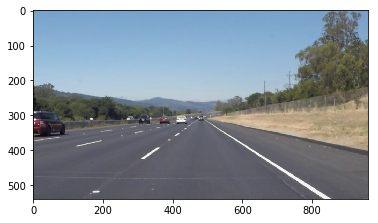

In [20]:
    # Next, I'll select any pixels below the threshold and set them to zero.

    # After that, all pixels that meet my color criterion (those above the threshold) will be retained, 
    # and those that do not (below the threshold) will be blacked out.

# Identify pixels below the threshold
thresholds = (image[:,:,0] < rgb_threshold[0]) \
            | (image[:,:,1] < rgb_threshold[1]) \
            | (image[:,:,2] < rgb_threshold[2])
color_select[thresholds] = [0,200,100]

# Display the image                 
plt.imshow(color_select)
plt.show()

In [22]:
# The result, color_select, is an image in which pixels that were above the threshold have been retained, and pixels below the threshold have been blacked out.

# In the code snippet above, red_threshold, green_threshold and blue_threshold are all set to 0, which implies all pixels will be included in the selection.

# In the next quiz, you will modify the values of red_threshold, green_threshold and blue_threshold until you retain as much of the lane lines as possible while dropping everything else. Your output image should look like the one below.

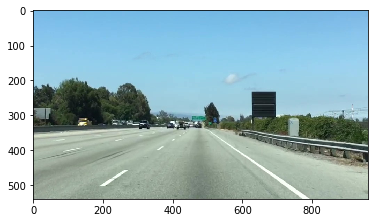

In [26]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np

# Read in the image
image = mpimg.imread('1.jpg')

# Grab the x and y size and make a copy of the image
ysize = image.shape[0]
xsize = image.shape[1]
color_select = np.copy(image)

# Define color selection criteria
###### MODIFY THESE VARIABLES TO MAKE YOUR COLOR SELECTION
red_threshold = 0
green_threshold = 0
blue_threshold = 0
######

rgb_threshold = [red_threshold, green_threshold, blue_threshold]

# Do a boolean or with the "|" character to identify
# pixels below the thresholds
thresholds = (image[:,:,0] < rgb_threshold[0]) \
            | (image[:,:,1] < rgb_threshold[1]) \
            | (image[:,:,2] < rgb_threshold[2])
color_select[thresholds] = [0,0,0]

# Display the image                 
plt.imshow(color_select)

# Uncomment the following code if you are running the code locally and wish to save the image
# mpimg.imsave("test-after.png", color_select)


This image is:  <class 'numpy.ndarray'> with dimensions: (540, 960, 3)


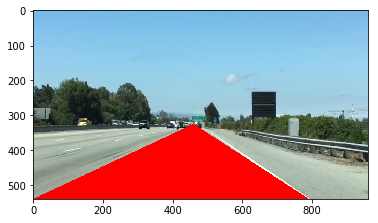

In [36]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np

# Read in the image and print some stats
image = mpimg.imread('1.jpg')
print('This image is: ', type(image), 'with dimensions:', image.shape)

# Pull out the x and y sizes and make a copy of the image
ysize = image.shape[0]
xsize = image.shape[1]
region_select = np.copy(image)

# Define a triangle region of interest 
# Keep in mind the origin (x=0, y=0) is in the upper left in image processing
# Note: if you run this code, you'll find these are not sensible values!!
# But you'll get a chance to play with them soon in a quiz 
left_bottom = [0, 539]
right_bottom = [790,539]
apex = [460,325]

# Fit lines (y=Ax+B) to identify the  3 sided region of interest
# np.polyfit() returns the coefficients [A, B] of the fit

#ployfit polyfit函数用于进行曲线拟合的一个函数，最小二乘法曲线拟合原理   最后一个参数代表阶数
fit_left = np.polyfit((left_bottom[0], apex[0]), (left_bottom[1], apex[1]), 1)
fit_right = np.polyfit((right_bottom[0], apex[0]), (right_bottom[1], apex[1]), 1)
fit_bottom = np.polyfit((left_bottom[0], right_bottom[0]), (left_bottom[1], right_bottom[1]), 1)

# Find the region inside the lines
# [X,Y] = meshgrid(x,y) 将向量x和y定义的区域转换成矩阵X和Y,
# 其中矩阵X的行向量是向量x的简单复制，而矩阵Y的列向量是向量y的简单复制(注：下面代码中X和Y均是数组，在文中统一称为矩阵了)。
XX, YY = np.meshgrid(np.arange(0, xsize), np.arange(0, ysize))
region_thresholds = (YY > (XX*fit_left[0] + fit_left[1])) & \
                    (YY > (XX*fit_right[0] + fit_right[1])) & \
                    (YY < (XX*fit_bottom[0] + fit_bottom[1]))

# Color pixels red which are inside the region of interest
region_select[region_thresholds] = [255, 0, 0]

# Display the image
plt.imshow(region_select)

In [37]:
# Canny边缘检测算子是一种多级检测算法。1986年由John F. Canny提出，同时提出了边缘检测的三大准则：

# 低错误率的边缘检测：检测算法应该精确地找到图像中的尽可能多的边缘，尽可能的减少漏检和误检。
# 最优定位：检测的边缘点应该精确地定位于边缘的中心。
# 图像中的任意边缘应该只被标记一次，同时图像噪声不应产生伪边缘